___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre:

## Fecha: 28 de Noviembre del 2018

## Por: Oscar David Jaramillo Z.

Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los siguientes problemas que desean solucionar:
> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 
> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.
> 3. El cuarto cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.
> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Para cada uno de los clientes, se debe de presentar 4 posibles estrategias de cobertura usando opciones Europeas, Americanas, Barrera y Asiáticas, tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo.

> ###  Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - La valuación de cada tipo de opción corresponderá al 20% de la calificación final.
> - La decisión o recomendación basado en sus análisis que le recomendarán a cada compañía corresponderá a 20%.

> ### Entrega
> Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el miércoles 28 de noviembre a las 6 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as st
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
import time,math 

%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 3)

In [2]:
def calc_daily_ret(closes:'Close prices'):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [3]:
def Riemann_approach(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad'):
    ndays = (expiracy-datetime.today().date()).days
    nscen = 100000
    dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
    sim_closes = S0*np.exp(sim_ret.cumsum())
    Average_t = sim_closes.expanding().mean()
    # Definimos el dataframe de strikes
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=dates)
    # Calculamos el call de la opción según la formula obtenida para Sumas de Riemann
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=dates)
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    return call.iloc[-1].Prima,i1[0],i1[1]

# Descarga de datos
Lo que se descargara es el futuro del aluminio con la intencion de cubrir 25 toneladas por contrato

In [4]:
aluminum=pd.read_excel('precios/Aluminum Futures Historical Data.xlsx')

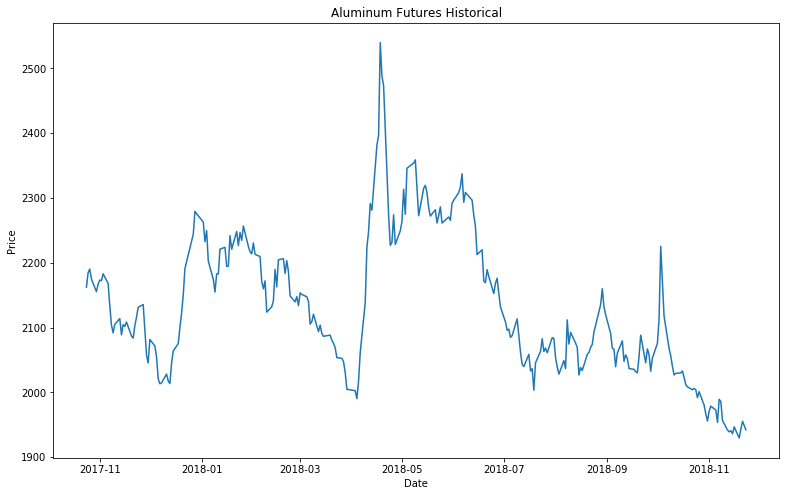

In [5]:
plt.figure(figsize=(13,8))
plt.plot(aluminum['Date'],aluminum['Price'])
plt.title('Aluminum Futures Historical')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

<function matplotlib.pyplot.xlabel(s, *args, **kwargs)>

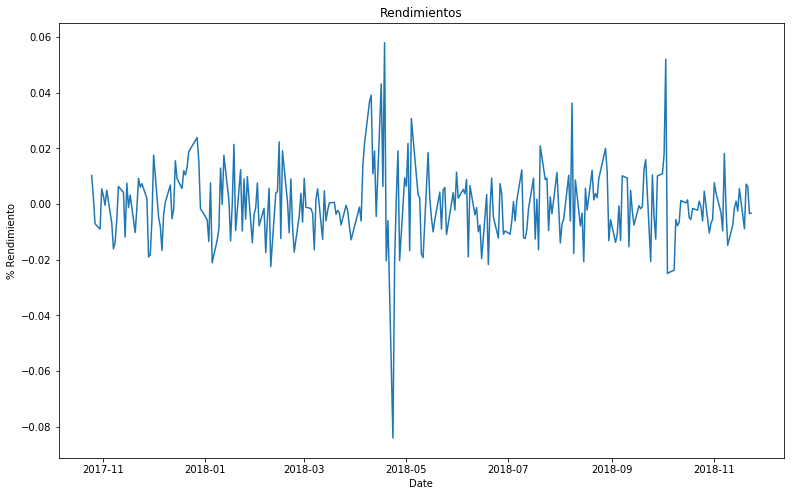

In [6]:
ret_aluminum = calc_daily_ret(aluminum['Price'])
plt.figure(figsize=(13,8))
plt.plot(aluminum.iloc[1:276,0],ret_aluminum)
plt.title('Rendimientos')
plt.xlabel('Date')
plt.ylabel('% Rendimiento')
plt.xlabel

# CALL EUROPEO

In [7]:
mu = ret_aluminum.mean()   # valor medio de los rendimientos
sigma = ret_aluminum.std() # desviación estándar de los rendimientos
r = 0.026/360         #  tasa libre de riesgo 
mu, sigma, r

(-0.0003901900049312379, 0.01341051567143842, 7.222222222222222e-05)

In [8]:
expiracy=datetime.date(datetime.strptime('01/01/2019','%d/%m/%Y'))

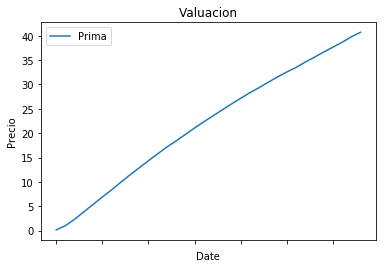

In [9]:
K = 2000
S0 = aluminum['Price'].iloc[-1]
ndays = (expiracy-datetime.today().date()).days
nscen = 100000
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot()
plt.title('Valuacion')
plt.xlabel('Date')
plt.ylabel('Precio')
plt.show()

In [10]:
print('Prima de un Call europeo $',call.iloc[-1][0])

Prima de un Call europeo $ 40.70978141455115


In [11]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(39.762020543002194, 41.65754228610011)


# CALL ASIATICO

In [12]:
NbTraj = [nscen]
NbStep = [ndays]
K = 2000
S0 = aluminum['Price'].iloc[-1]
T = ndays/252        # Tiempo de cierre - años

M = list(map(lambda N_tra:list(map(lambda N_ste:Riemann_approach(K,r,S0,N_tra,N_ste,sigma),NbStep)),NbTraj))

In [13]:
M

[[(16.19146649150888, 14.48233087612306, 17.900602106894702)]]

# CALL BARRERA

In [14]:
B = 2200    # Precio barrera
barrier = pd.DataFrame(B*np.ones((ndays, nscen)),index=dates)
I = (sim_closes>barrier).cumsum()>0

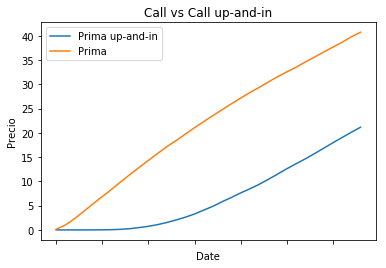

In [15]:
callui = pd.DataFrame({'Prima up-and-in':np.exp(-r*ndays)*(I*np.fmax(sim_closes-strike,np.zeros((ndays,nscen)))).T.mean()},index=dates)
ax = callui.plot();
call.plot(ax=ax);
plt.title('Call vs Call up-and-in')
plt.xlabel('Date')
plt.ylabel('Precio')
plt.show()

In [16]:
print('Prima de un Call up-and-in $',callui.iloc[-1][0])

Prima de un Call up-and-in $ 21.15100618079669


In [17]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = callui.iloc[-1][0]
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(20.20324530924773, 22.098767052345647)


# CALL AMERICANO

In [18]:
def chequeo(results,num_sim,num_days,r,K,sim_closes,j,l):
    if(j==0):
        print
        Y_present=list(map(lambda i: np.exp(-r*1)*(K-sim_closes.iloc[num_days-l,i]) if K-sim_closes.iloc[num_days-l,i]>0 else 0,range(num_sim)))
    else:
        Y_present=np.exp(-r*1)*results.iloc[j-1,:]
    return Y_present

In [19]:
def minimos_cuadrados(num_sim,num_days,sim_closes,Y_present,l):
    xdata=list(map(lambda i: sim_closes.iloc[num_days-(l+1),i] if Y_present[i]<sim_closes.iloc[num_days-(l+1),i] and Y_present[i]!=0 else 0,range(num_sim)  ))
    xdata=list(filter(lambda x:x!=0,xdata))
    ydata=list(map(lambda i: Y_present[i] if Y_present[i]<sim_closes.iloc[num_days-(l+1),i] and Y_present[i]!=0 else 0,range(num_sim)))
    ydata=list(filter(lambda x:x!=0,ydata))
    A=pd.DataFrame(np.zeros([len(xdata),3]))
    A[0] = np.ones(len(xdata))
    A[1] = pd.DataFrame(xdata)
    A[2] = pd.DataFrame(list(xdata))**2
    coef = np.dot(np.linalg.pinv(A),ydata)
    return coef

In [20]:
def valor_esperado(num_sim,num_days,Y_present,sim_closes,coef,l):
    Y_exp=list(map(lambda i:coef[0]+coef[1]*sim_closes.iloc[num_days-(l+1),i]+coef[2]*sim_closes.iloc[num_days-(l+1),i]**2 if Y_present[i]!=0 else 0 ,range(num_sim)))
    return Y_exp

In [21]:
def valor_presente(num_sim,num_days,K,Y_present,Y_exp,sim_closes,results,j,l):
    result=list(map(lambda i:K-sim_closes.iloc[num_days-(l+1),i] if K-sim_closes.iloc[num_days-(l+1),i]>=Y_exp[i] and Y_present[i]!=0 else Y_present[i],range(num_sim)))
    results.iloc[j,:]=result
    return results

In [22]:
def func(num_sim,num_days,r,K,sim_closes,results,j,l):
    Y_present=chequeo(results,num_sim,num_days,r,K,sim_closes,j,l)
    coef=minimos_cuadrados(num_sim,num_days,sim_closes,Y_present,l)
    Y_exp=valor_esperado(num_sim,num_days,Y_present,sim_closes,coef,l)
    results=valor_presente(num_sim,num_days,K,Y_present,Y_exp,sim_closes,results,j,l)
    return results

In [23]:
K = 2000
S0 = aluminum['Price'].iloc[-1]
dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
num_sim=nscen
num_days=ndays

In [24]:
results=pd.DataFrame(np.zeros([num_days,num_sim]))
temp=list(map(lambda j,l:func(num_sim,num_days,r,K,sim_closes,results,j,l),range(num_days),np.arange(num_days)+1))

In [25]:
final_ans=np.mean(np.exp(-r)*results.iloc[num_days-1,:])

In [26]:
print('Prima de un Call americano $',final_ans)

Prima de un Call americano $ 98.26486213033193


In [27]:
confianza = 0.95
sigma_est = results.iloc[-1].sem()
mean_est = final_ans
# i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(97.60648661248466, 98.92323764817921)


# Recomendacion

Segun como ha sido el comportamiento historico del aluminio a lo largo de este año, podemos saber que tiene una tendencia lateral pero con cambios bruscos por lo cual la mejor recomendacion seria usar una opcion asiatica, es mucho mas barato que una europea, la recomendacion de una barrera seria arriesgado ya que la tendencia no esta definida, si se usara una opcion que desactivara se correria el riesgo por la alta volatilidad, de que la toque y se pierda la opcion, usar una que activara podria ser reomendado, pero resulta mas cara que la asiatica.

La opcion esta diseñada para principio de año ya que se espera que para ese entonces la tendencia se ddefina y una nueva estrategia se puede elaborar

### Por lo tanto la mas recomendable es la asiatica